In [5]:


import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import img_as_ubyte

In [6]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [7]:
image_paths = [
    r"data\example\IMG_0040_1.tif",
    r"data\example\IMG_0040_2.tif",
    r"data\example\IMG_0040_3.tif",
    r"data\example\IMG_0040_4.tif",
    r"data\example\IMG_0040_5.tif",
]

In [24]:
# load images
images16bit = [cv2.imread("../../../" + image_path, cv2.IMREAD_UNCHANGED) for image_path in image_paths]
# TODO equalize histogram


images = [(image / 256).astype('uint8') for image in images16bit]
images = [cv2.equalizeHist(image) for image in images]

In [251]:
# align images

(1088, 1456)
(1088, 1456)
uint16
uint8


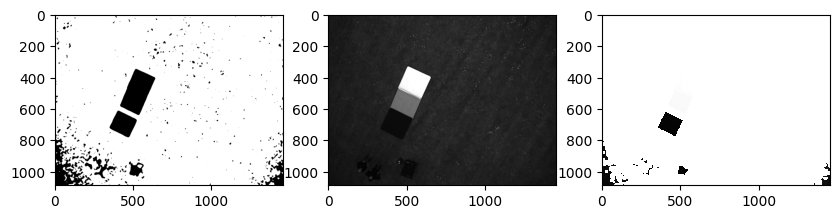

In [31]:
# preprocess images
image = images[1]
image16bit = images16bit[1]


def filter_by_variance(img, blur_kernel_size=15):
    blur_non = cv2.GaussianBlur(image, (blur_kernel_size, blur_kernel_size), 2)
    for i in range(10):
        blur_non = cv2.GaussianBlur(blur_non, (blur_kernel_size, blur_kernel_size), 2)
    last_blur_non = cv2.GaussianBlur(image, (blur_kernel_size, blur_kernel_size), 2)
    return cv2.equalizeHist(img_as_ubyte((last_blur_non - blur_non) ** 2))


variance = filter_by_variance(image)
blur = cv2.medianBlur(variance, 11)
ret, thresh1 = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY)

mask = thresh1

In [ ]:
# mean the radiance values to get a radiance value for the detection
print(mask.shape)
print(image16bit.shape)
print(image16bit.dtype)
masked = np.ma.array(image, mask=mask, fill_value=0)
print(masked.dtype)
output = masked
fig, ax = plt.subplots(1, 3, figsize=(10, 20))
ax[0].imshow(mask)
ax[1].imshow(image16bit)
ax[2].imshow(masked)

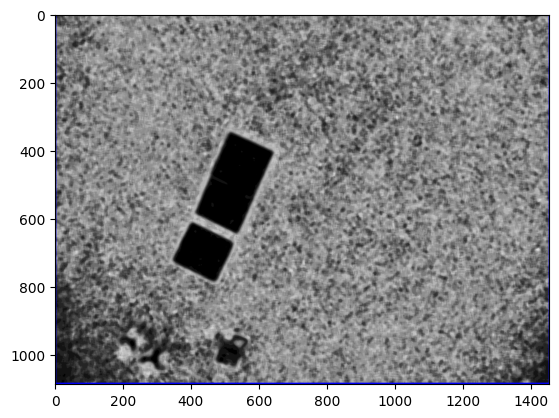

In [32]:
# detect bounding boxes
contours, hierarchy = cv2.findContours(output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
value = 0.02
im = np.expand_dims(blur, axis=2).repeat(3, axis=2)
for c in contours:
    area = cv2.contourArea(c)
    if area < 50:
        continue
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, value * perimeter, True)
    if len(approx) == 4:
        cv2.drawContours(im, [approx], 0, (0, 0, 255), 5)
plt.imshow(im)

In [ ]:
# save bounding boxes